# UtilsNotebook incluye funciones auxiliares para los ejemplos 

In [1]:
#init modules
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

#set basic vars
baseDir=os.path.join('..','..','ExamplesRepo')
#file name, tuple with only one name, use baseFileNameList=('j.png',) because baseFileNameList=('j.png') is a string
# ver https://medium.com/@GalarnykMichael/python-basics-9-tuples-tuple-manipulation-and-the-fibonacci-sequence-2d0da4e2d326
baseFileNameList=('j.png','jnoise1.png','jnoise2.png', 'cameraman.tif', 'eight.tif')

In [2]:
#store the images in a dictionary
#using a comprehension solution 
imgDict={name: None for name in baseFileNameList}
for name in baseFileNameList:
    fileName=os.path.join(baseDir, name)
    imgDict[name] = cv2.imread(fileName, cv2.COLOR_RGB2BGR)   


## declaracion de las funciones de utilidades

### disp2img

In [3]:
#esta fun muestra dos imagenes y devuelve los handles a los ejes para luego poder usarlos con un plot o un scatter
#sacado de https://python4astronomers.github.io/plotting/advanced.html
def disp2img(img1, img2, figSize=(5,5), img1Title="Original", img2Title="Filtered"):
    fig=plt.figure(figsize=figSize) # create a figure object
    
    #en general es mejor usar add_subplot para ver las diferencias con add_axes 
    #ver https://stackoverflow.com/questions/43326680/what-are-the-differences-between-add-axes-and-add-subplot
    axis1 = fig.add_subplot(1, 2, 1)  # create 1st sub axes object in the figure 
    axis1.imshow(img1)
    axis1.set_xticks([]), axis1.set_yticks([])
    axis1.set_title(img1Title, fontsize='large')
          
    axis2= fig.add_subplot(1, 2, 2)  # create 2nd sub axes object in the figure
    axis2.imshow(img2)
    axis2.set_xticks([]), axis2.set_yticks([])   
    axis2.set_title(img2Title, fontsize='large')
    
    
    return axis1, axis2;

### ejemplo de uso de disp2img

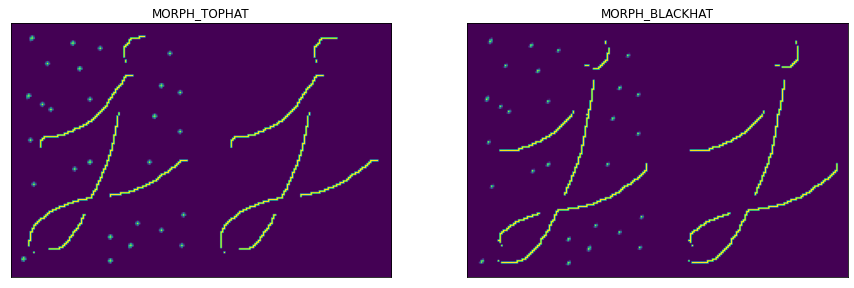

In [4]:
name=baseFileNameList[1]
img=imgDict[name]
kernel = np.ones((2,2),np.uint8)
imgnew1 = cv2.morphologyEx(img,cv2.MORPH_TOPHAT, kernel)
imgnew2 = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)

disp2img(imgnew1, imgnew2,  img2Title="MORPH_BLACKHAT", img1Title="MORPH_TOPHAT", figSize=(15,15));